# DSCI 503 - Homework 05
### Sean Kilfoy

## Problem 1:  Working with 2D Arrays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
Z = np.random.uniform(0, 10, (5, 8))
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [3]:
print("Row 3:   ", Z[2])
print("Column 6:", Z[:, 5])

Row 3:    [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: [0.92 8.78 9.68 8.78 8.35]


In [4]:
row_sums = np.sum(Z, axis=1)
col_sums = np.sum(Z, axis=0)
array_sum = np.sum(Z)

print("Row Sums:   ", row_sums)
print("Column Sums:", col_sums)
print("Array Sum:  ", array_sum)

Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:   183.68


## Problem 2: Reshaping and Stacking Arrays

In [5]:
np.random.seed(167)

x1 = np.random.normal(50, 10, 1000)
x2 = np.random.normal(20, 5, 1000)
x3 = np.random.normal(100, 30, 1000)
x4 = np.random.normal(10, 2, 1000)

X = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1)))
X = np.round(X, 2)

print("Shape of X:", X.shape)

Shape of X: (1000, 4)


In [6]:
print(X[:6])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


## Problem 3: Standardization

In [7]:
col_means = np.mean(X, axis=0)
col_stds = np.std(X, axis=0)

print("Column means:              ", col_means.round(2))
print("Column standard deviations:", col_stds.round(2))

Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]


In [8]:
W = (X - col_means) / col_stds
W_col_means = np.mean(W, axis=0)
W_col_stds = np.std(W, axis=0)

print("Column means:              ", W_col_means.round(2))
print("Column standard deviations:", W_col_stds.round(2))

Column means:               [ 0. -0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [9]:
auto = pd.read_table("auto_mpg.txt", sep='\t',)
auto.head(10)

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d
5,31.0,4,1773,asia,toyota corolla 1200
6,27.4,4,2670,usa,amc spirit dl
7,39.1,4,1755,asia,toyota starlet
8,34.3,4,2188,eur,audi 4000
9,30.0,4,2155,usa,buick opel isuzu deluxe


In [10]:
print("Shape of auto dataframe:", auto.shape)

Shape of auto dataframe: (398, 5)


In [11]:
print("Means of numerical columns:", auto.loc[:,['mpg', 'cyl', 'wt']].mean(), sep='\n\n')


Means of numerical columns:

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])

print(regions)

['asia' 'eur' 'usa']


In [13]:
asia_auto = auto[auto['region'] == 'asia']
eur_auto = auto[auto['region'] == 'eur']
usa_auto = auto[auto['region'] == 'usa']

asia_count = asia_auto.shape[0]
eur_count = eur_auto.shape[0]
usa_count = usa_auto.shape[0]

print("Number of cars manufactured in Asia:  ", asia_count)
print("Number of cars manufactured in Europe:", eur_count)
print("Number of cars manufactured in USA:  ", usa_count)

Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:   249


In [14]:
asia_means = asia_auto[['mpg', 'cyl', 'wt']].mean()
eur_means = eur_auto[['mpg', 'cyl', 'wt']].mean()
usa_means = usa_auto[['mpg', 'cyl', 'wt']].mean()

asia_means
eur_means
usa_means

mpg      20.083534
cyl       6.248996
wt     3361.931727
dtype: float64

In [15]:
mean_df = pd.DataFrame([asia_means, eur_means, usa_means], index=regions)

mean_df

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

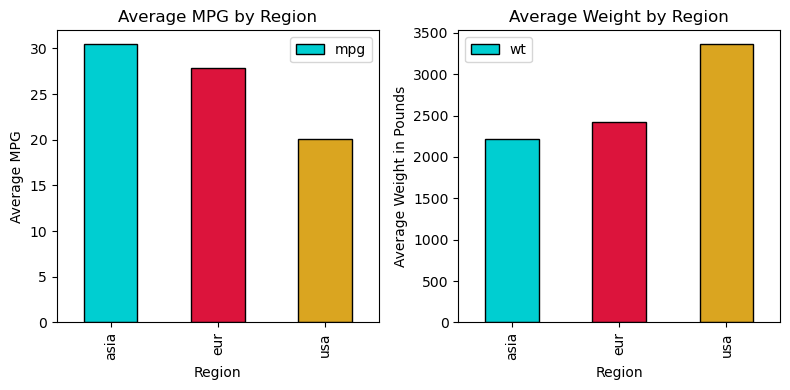

In [16]:
colors1 = ['darkturquoise', 'crimson', 'goldenrod']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[8,4])
mean_df.plot(kind='bar', y='mpg', ax=ax1, color=colors1, edgecolor='black')
mean_df.plot(kind='bar', y='wt', ax=ax2, color=colors1, edgecolor='black')

ax1.set_title("Average MPG by Region")
ax1.set_ylabel("Average MPG")
ax1.set_xlabel("Region")

ax2.set_title("Average Weight by Region")
ax2.set_ylabel("Average Weight in Pounds")
ax2.set_xlabel("Region")

plt.tight_layout()
plt.show()


## Problem 7: Relationship between Weight and Miles Per Gallon

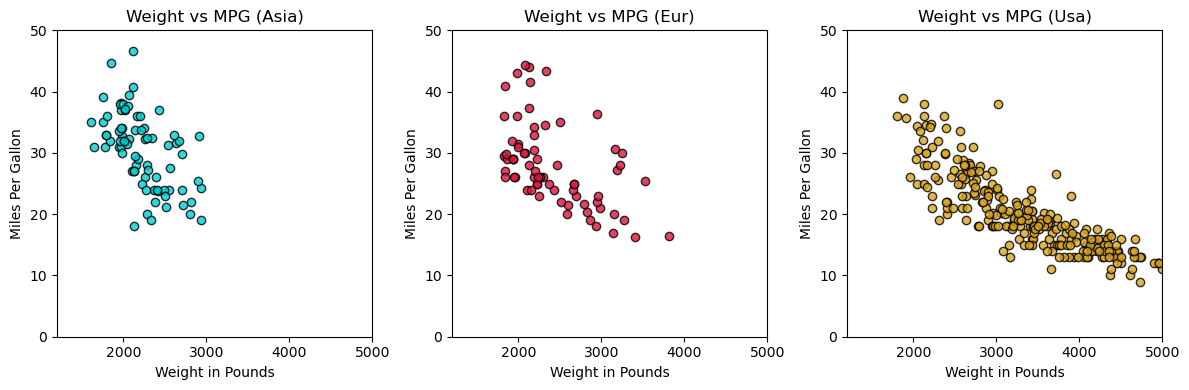

In [17]:
plt.figure(figsize=[12,4])

for i, region in enumerate(regions):
    plt.subplot(1, 3, i+1)
    mask = auto[auto['region'] == region]
    plt.scatter(mask['wt'],
                mask['mpg'],
                color=colors1[i],
                edgecolors='black',
                alpha=0.8)
    plt.xlim([1200, 5000])
    plt.ylim([0, 50])
    plt.xlabel('Weight in Pounds')
    plt.ylabel('Miles Per Gallon')
    plt.title(f'Weight vs MPG ({region.title()})')

plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution by Region

In [18]:
cyl_values = np.unique(auto['cyl'])
print(cyl_values)

[3 4 5 6 8]


In [19]:
cyl_df = auto['cyl']
reg_df = auto['region']
cyl_counts_by_region = pd.crosstab(cyl_df, reg_df)
cyl_counts_by_region

region,asia,eur,usa
cyl,,,
3,4,0,0
4,69,63,72
5,0,3,0
6,6,4,74
8,0,0,103


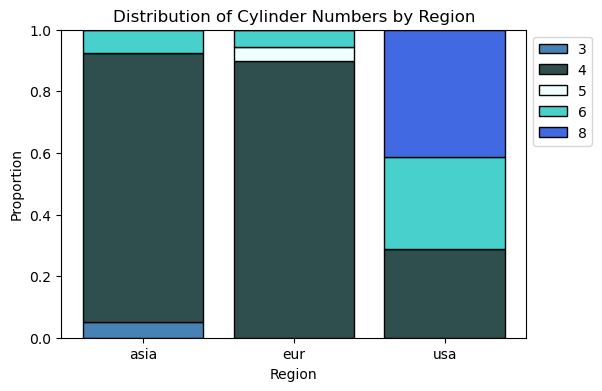

In [20]:
cyl_props_by_region = cyl_counts_by_region / cyl_counts_by_region.sum()

bar_bottoms = np.cumsum(cyl_props_by_region) - cyl_props_by_region

colors2 = ['steelblue', 'darkslategrey', 'azure', 'mediumturquoise', 'royalblue']

plt.figure(figsize=[6,4])

for i in range(len(cyl_values)):
    plt.bar(cyl_props_by_region.columns,
            cyl_props_by_region.iloc[i],
            bottom=bar_bottoms.iloc[i],
            label=cyl_values[i],
            edgecolor='black',
            color=colors2[i])

plt.xlabel('Region')
plt.ylabel('Proportion')
plt.title('Distribution of Cylinder Numbers by Region')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()
